In [48]:
import numpy as np
import pandas as pd
import math
import os.path
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv("dataset/train.csv")

In [12]:
#Euresh prwtou seismou = 5656573
for i in range (0,len(df1.time_to_failure)):
    if df1.time_to_failure[i]<df1.time_to_failure[i+1]:
        print(i)

5656573


KeyboardInterrupt: 

In [43]:
dts=np.array([p.ttf[i]-p.ttf[i-1] for i  in range(1,5656573)])
dts

array([-1.09999987e-09, -1.10000031e-09, -1.09999965e-09, ...,
       -1.09958000e-09, -1.10049000e-09, -1.09958000e-09])

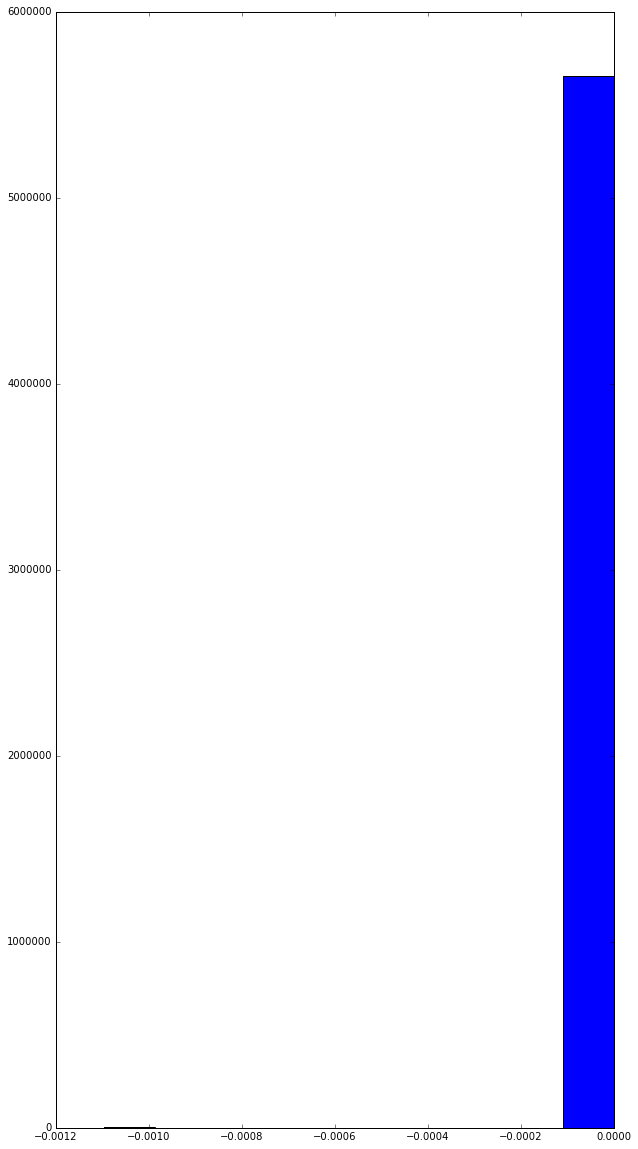

In [50]:
plt.figure(figsize=(10, 20))
plt.hist(dts)
plt.savefig("out.png")


In [52]:
from scipy.interpolate import interp1d


In [163]:
#Κάνω column σε lists
s1 = df1["acoustic_data"].values[:5656573]
t1 = df1["time_to_failure"].values[:5656573]
#Αντιστροφη χρόνου (fuck entropy)
t1.sort()


(0.0, 3.000509481760366e-07)

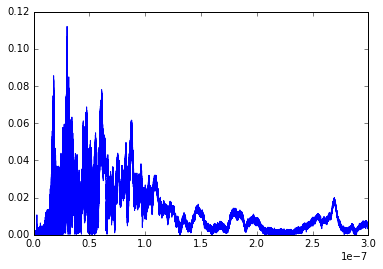

In [164]:
dt=t1[5000]-t1[4999] #Χρονική διαφορά ανάμεσα σε δύο παρατηρήσεις (δεκαδική μορφή)
freq=np.fft.fftfreq(5656573,d=dt) 
fs=np.abs(np.fft.fft(s1))/5656573
plt.plot(1./freq[freq>0],fs[freq>0])
plt.xlim(None,3.000509481760366e-07)

In [165]:
Maxf= 1./freq[fs[freq>0].argmax()] #Υπολόγισε τη περίοδο για την οποία έχουμε μέγιστο
Maxf

3.001764194308693e-08

In [209]:
#CHUNKS
n = 100000
t = [t1[i * n:(i + 1) * n] for i in range((len(t1) + n - 1) // n )]  
s = [s1[i * n:(i + 1) * n] for i in range((len(s1) + n - 1) // n )]  


In [210]:
FR=[]
Ind=[]
for i in range(0,len(t)-1):
    freq=np.fft.fftfreq(len(t[i]),d=dt) 
    fs=np.abs(np.fft.fft(s[i]))/len(t[i])
    Maxf= 1./freq[fs[freq>0].argmax()]
    FR.append(Maxf)
    Ind.append(i)


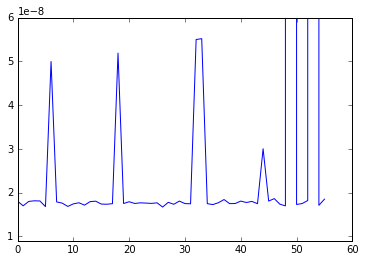

In [211]:
plt.ylim(9.000509481760366e-09,6.000509481760366e-08)
plt.plot(Ind,FR)

In [112]:
s2=interp1d(s1,t1) #Δημιουργία ενος interpolated "συνεχούς" σήματος με βάση τα δεδομένα 
t2=np.linspace(t1[0],t1[-1],5656573 ) #Δημιουργία ενός "συνεχούς" ισοχρονικών διαστημάτων


In [120]:
s2(t2)


array([0.67807805, 0.67807824, 0.67807843, ..., 0.95959048, 0.95959027,
       0.95959006])

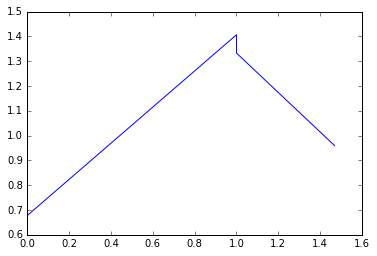

In [119]:
s2(t2)
plt.plot(t2,s2(t2))

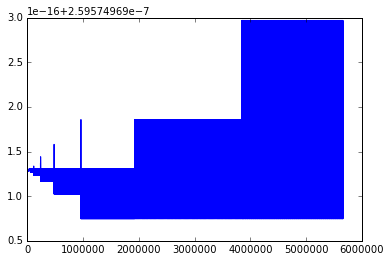

In [114]:
dts2=[t2[i]-t2[i-1] for i  in range(1,5656573)]
plt.plot(dts2)

2.5957496912912357e-07


/home/stamstath96/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


inf


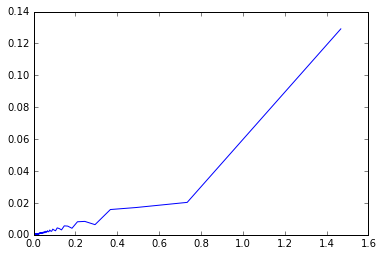

In [115]:
dt=t2[4]-t2[3]
print(dt)
freq=np.fft.fftfreq(5656573,d=dt)
fs=np.abs(np.fft.fft(s2(t1)))/s1.shape[0]
plt.plot(1./freq[freq>0],fs[freq>0])
print(1./freq[fs[freq>0].argmax()])